# `pyroomacoustics` demo for microphone directivities

 In this IPython notebook, we demonstrate how to add a microphone with directivities using pyroomacoustics and look at how this affects the RIR plots and output signals :

In [58]:
import pyroomacoustics as pra
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython
from pyroomacoustics.directivities import DirectivityPattern, DirectionVector, CardioidFamily

In [60]:
def make_room(dimensions, material, fs, max_order):
    return pra.ShoeBox(
            p = dimensions,
            materials=pra.Material(material),
            fs=fs,
            max_order=max_order,
        )


## original signal

In [59]:
fs, signal = wavfile.read("arctic_a0001.wav")
print("Original WAV:")
IPython.display.Audio(signal, rate=fs)

Original WAV:


## CASE 1: omnidirectional microphone

3-D plot for case 1:


/Users/satvikdixit/Documents/GitHub/pyroomacoustics/pyroomacoustics/room.py:1412: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = a3.Axes3D(fig)


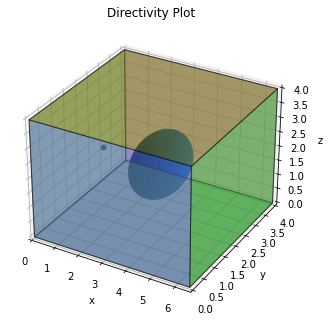

2-D plot for case 1:


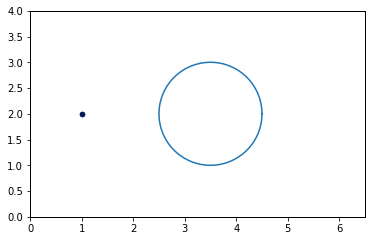

RIR plot for case 1:


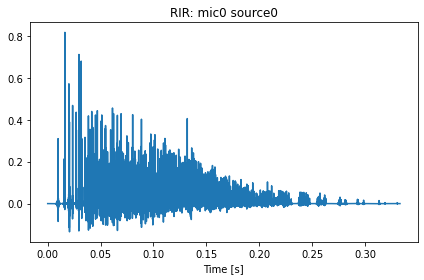

Simulated propagation to mic with omnidirectional directivity:


trucated audio:


In [61]:
# make room by specifying the parameters
room1 = make_room(dimensions=[6.5, 4, 4], material=0.07, fs=16000, max_order=17)

# add source signal
room1.add_source([1,2,2], signal = signal)
fig1, ax1 = room1.plot()
ax1.set_xlim([0, 6.5])
ax1.set_ylim([0, 4])
ax1.set_zlim([0, 4])

# add microphone with omnidirectional directivity 
PATTERN = DirectivityPattern.OMNI
ORIENTATION = DirectionVector(azimuth=0, colatitude=0, degrees=True)
directivity1 = CardioidFamily(orientation=ORIENTATION, pattern_enum=PATTERN)

room1.add_microphone([3.5,2,2], directivity=directivity1)

# 3-D plot
azimuth = np.linspace(start=0, stop=360, num=361, endpoint=True)
colatitude = np.linspace(start=0, stop=180, num=180, endpoint=True)

print("3-D plot for case 1:")
directivity1.plot_response(azimuth=azimuth, colatitude=colatitude, degrees=True, ax=ax1, offset=[3.5,2,2])
plt.show()

# 2-D plot
corners = np.array([[0,4], [6.5,4], [6.5,0], [0,0]]).T 
room = pra.Room.from_corners(corners)
room.add_source([1,2])
fig, ax = room.plot()

print("2-D plot for case 1:")
directivity1.plot_response(azimuth=azimuth, colatitude=None, degrees=True, ax=ax, offset=[3.5,2])
plt.show()

# plot RIR
print("RIR plot for case 1:")
room1.plot_rir()
plt.show()

# display output signal for case 1
room1.simulate()
print("Simulated propagation to mic with omnidirectional directivity:")
IPython.display.display(IPython.display.Audio(room1.mic_array.signals[0,:], rate=fs))



## CASE 2: microphone with directivity pointing away from the source

3-D plot for case 2:


/Users/satvikdixit/Documents/GitHub/pyroomacoustics/pyroomacoustics/room.py:1412: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = a3.Axes3D(fig)


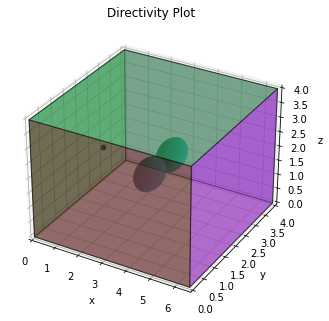

2-D plot for case 2:


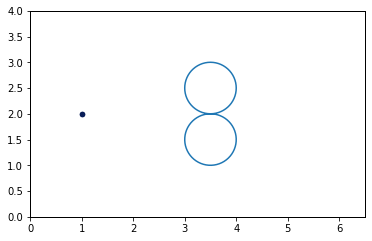

RIR plot for case 2:


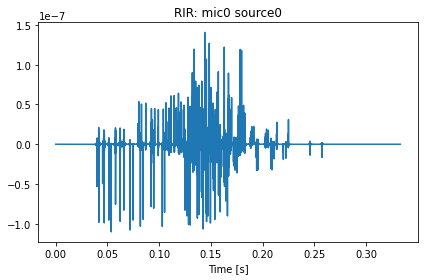

Simulated propagation to mic with directivity pointing away from the source:


In [62]:
# make room with the same parameters as before
room2 = make_room(dimensions=[6.5, 4, 4], material=0.07, fs=16000, max_order=17)

# add source signal to the same point as before
room2.add_source([1,2,2], signal = signal)
fig2, ax2 = room2.plot()
ax2.set_xlim([0, 6.5])
ax2.set_ylim([0, 4])
ax2.set_zlim([0, 4])

# add microphone with omnidirectional directivity 
PATTERN = DirectivityPattern.FIGURE_EIGHT
ORIENTATION = DirectionVector(azimuth=90, colatitude=90, degrees=True)
directivity2 = CardioidFamily(orientation=ORIENTATION, pattern_enum=PATTERN)

room2.add_microphone([3.5,2,2], directivity=directivity2)

# 3-D plot
azimuth = np.linspace(start=0, stop=360, num=361, endpoint=True)
colatitude = np.linspace(start=0, stop=180, num=180, endpoint=True)

print("3-D plot for case 2:")
directivity2.plot_response(azimuth=azimuth, colatitude=colatitude, degrees=True, ax=ax2, offset=[3.5,2,2])
plt.show()

# 2-D plot
corners = np.array([[0,4], [6.5,4], [6.5,0], [0,0]]).T 
room = pra.Room.from_corners(corners)
room.add_source([1,2])
fig, ax = room.plot()

print("2-D plot for case 2:")
directivity2.plot_response(azimuth=azimuth, colatitude=None, degrees=True, ax=ax, offset=[3.5,2])
plt.show()

# plot RIR
print("RIR plot for case 2:")
room2.plot_rir()
plt.show()

# display output signal for case 2
room2.simulate()
print("Simulated propagation to mic with directivity pointing away from the source:")
IPython.display.Audio(room2.mic_array.signals[0,:], rate=fs)


## CASE 3: microphone with directivity pointing towards from the source

3-D plot for case 3:


/Users/satvikdixit/Documents/GitHub/pyroomacoustics/pyroomacoustics/room.py:1412: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = a3.Axes3D(fig)


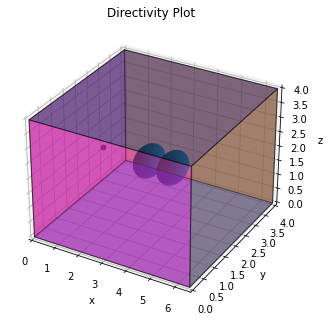

2-D plot for case 3:


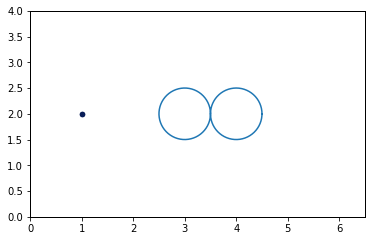

RIR plot for case 3:


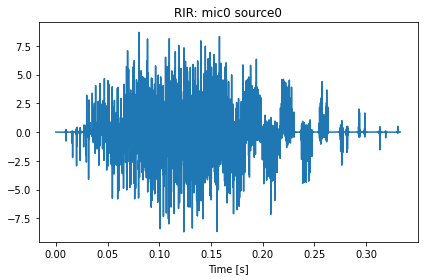

Simulated propagation to mic with directivity pointing towards the source:


In [63]:
# make room with the same parameters as before
room3 = make_room(dimensions=[6.5, 4, 4], material=0.07, fs=16000, max_order=17)

# add source signal to the same point as before
room3.add_source([1,2,2], signal = signal)
fig3, ax3 = room3.plot()
ax3.set_xlim([0, 6.5])
ax3.set_ylim([0, 4])
ax3.set_zlim([0, 4])

# add microphone with omnidirectional directivity 
PATTERN = DirectivityPattern.FIGURE_EIGHT
ORIENTATION = DirectionVector(azimuth=0, colatitude=90, degrees=True)
directivity3 = CardioidFamily(orientation=ORIENTATION, pattern_enum=PATTERN)

room3.add_microphone([3.5,2,2], directivity=directivity3)

# 3-D plot
azimuth = np.linspace(start=0, stop=360, num=361, endpoint=True)
colatitude = np.linspace(start=0, stop=180, num=180, endpoint=True)

print("3-D plot for case 3:")
directivity3.plot_response(azimuth=azimuth, colatitude=colatitude, degrees=True, ax=ax3, offset=[3.5,2,2])
plt.show()

# 2-D plot
corners = np.array([[0,4], [6.5,4], [6.5,0], [0,0]]).T 
room = pra.Room.from_corners(corners)
room.add_source([1,2])
fig, ax = room.plot()

print("2-D plot for case 3:")
directivity3.plot_response(azimuth=azimuth, colatitude=None, degrees=True, ax=ax, offset=[3.5,2])
plt.show()

# RIR plot
print("RIR plot for case 3:")
room3.plot_rir()
plt.show()

# display output signal for case 3
room3.simulate()
print("Simulated propagation to mic with directivity pointing towards the source:")
IPython.display.Audio(room3.mic_array.signals[0,:], rate=fs)